In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aggressive-behavior-video-classification/aggressive_behavior.csv
/kaggle/input/aggressive-behavior-video-classification/files/aggressive/3.mp4
/kaggle/input/aggressive-behavior-video-classification/files/aggressive/1.mp4
/kaggle/input/aggressive-behavior-video-classification/files/aggressive/4.mp4
/kaggle/input/aggressive-behavior-video-classification/files/aggressive/0.mp4
/kaggle/input/aggressive-behavior-video-classification/files/aggressive/2.mp4
/kaggle/input/aggressive-behavior-video-classification/files/non_aggressive/5.mp4
/kaggle/input/aggressive-behavior-video-classification/files/non_aggressive/3.mp4
/kaggle/input/aggressive-behavior-video-classification/files/non_aggressive/1.mp4
/kaggle/input/aggressive-behavior-video-classification/files/non_aggressive/4.mp4
/kaggle/input/aggressive-behavior-video-classification/files/non_aggressive/0.mp4
/kaggle/input/aggressive-behavior-video-classification/files/non_aggressive/2.mp4


In [2]:
import torch
import os

In [3]:
# install YOLOv5
%cd {HOME}
!git clone https://github.com/ultralytics/yolov5

%cd {HOME}/yolov5
!pip install -r requirements.txt

from IPython import display
display.clear_output()

In [4]:
# install YOLOv8
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.81 🚀 Python-3.10.14 torch-2.4.0+cpu CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5845.9/8062.4 GB disk)


In [5]:
# install Detectron1
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

from IPython import display
display.clear_output()

import detectron2
print("detectron2:", detectron2.__version__)

detectron2: 0.6


In [6]:
# install Supervision
!pip install supervision

from IPython import display
display.clear_output()

import supervision as sv
print("supervision", sv.__version__)

supervision 0.22.0


In [7]:
from ultralytics import YOLO
model = YOLO ('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 145MB/s]



0: 736x1280 9 persons, 8 cars, 1013.5ms
Speed: 22.6ms preprocess, 1013.5ms inference, 22.1ms postprocess per image at shape (1, 3, 736, 1280)


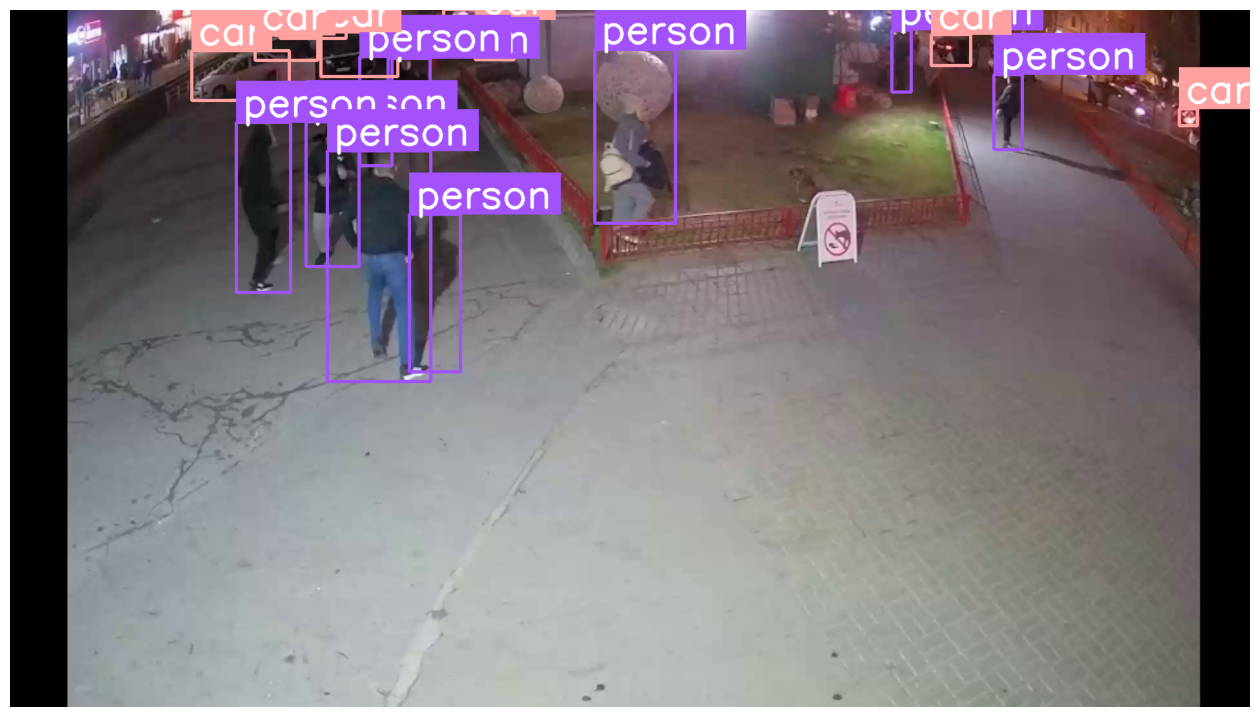

In [8]:
import supervision as sv
%matplotlib inline
import numpy as np

# extract video frame
generator = sv.get_video_frames_generator ('/kaggle/input/aggressive-behavior-video-classification/files/aggressive/1.mp4')
iterator = iter (generator)
frame = next (iterator)

# detect
results = model (frame, imgsz = 1280)[0]
detections = sv.Detections.from_ultralytics (results)

# annotate
box_annotator= sv.BoxAnnotator (thickness = 4)
label_annotator = sv.LabelAnnotator (text_thickness = 4, text_scale = 2)
frame = box_annotator.annotate (scene = frame, detections = detections)
frame = label_annotator.annotate (scene = frame, detections = detections)

sv.plot_image (frame, (16, 16))


0: 736x1280 9 persons, 8 cars, 859.6ms
Speed: 7.9ms preprocess, 859.6ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


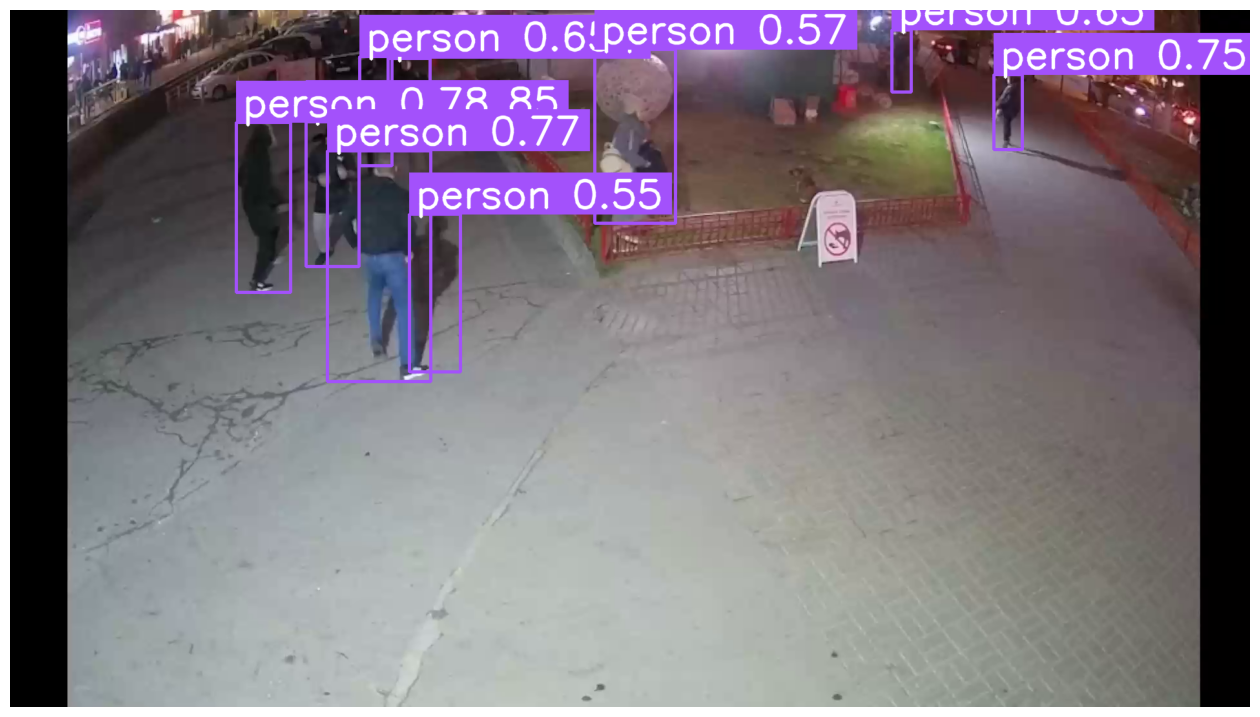

In [9]:
# extract video frame
generator = sv.get_video_frames_generator ('/kaggle/input/aggressive-behavior-video-classification/files/aggressive/1.mp4')
iterator = iter (generator)
frame = next (iterator)

# detect
results = model (frame, imgsz = 1280)[0]
detections = sv.Detections.from_ultralytics (results)
detections = detections [detections.class_id == 0]

# annotate
box_annotator= sv.BoxAnnotator (thickness = 4)
label_annotator = sv.LabelAnnotator (text_thickness = 4, text_scale = 2)
labels = [f'{model.names[class_id]} {confidence:0.2f}' for _, _, confidence, class_id, _, _ in detections]
frame = box_annotator.annotate (scene = frame, detections = detections)
frame = label_annotator.annotate (scene = frame, detections = detections, labels = labels)

sv.plot_image (frame, (16, 16))